In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('NODES3-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')

In [3]:
df

,timestamp,node_stack_messages_processed_per_sec,node_stack_messages_processed_count_per_sec,min_node_stack_messages_processed,lo_node_stack_messages_processed,avg_node_stack_messages_processed,hi_node_stack_messages_processed,max_node_stack_messages_processed,client_stack_messages_processed_per_sec,client_stack_messages_processed_count_per_sec,...,max_storage_pool_manager_tables_size,max_storage_bls_bft_readers,max_storage_bls_bft_tables_num,max_storage_bls_bft_tables_size,max_storage_seq_no_readers,max_storage_seq_no_tables_num,max_storage_seq_no_tables_size,max_storage_metrics_readers,max_storage_metrics_tables_num,max_storage_metrics_tables_size
0,2024-06-25 19:18:00,0.550000,31.633333,0,0.016555,0.017387,0.255630,5.0,0.000000,31.633333,...,0,0,0,720.0,0.0,0,720.0,0,0,10392.0
1,2024-06-25 19:19:00,0.000000,95.000000,0,0.000000,0.000000,0.000000,0.0,0.466667,95.000000,...,0,0,0,720.0,0.0,0,720.0,0,0,121144.0
2,2024-06-25 19:20:00,355.216667,41.400000,0,8.098441,8.580113,64.236558,1000.0,119.133333,41.400000,...,0,0,0,18216.0,0.0,0,1097456.0,0,0,269128.0
3,2024-06-25 19:21:00,416.400000,21.833333,0,17.173534,19.071756,99.684339,829.0,138.016667,21.833333,...,0,0,0,28624.0,0.0,0,2958896.0,0,0,397752.0
4,2024-06-25 19:22:00,461.300000,23.933333,0,17.359515,19.274373,93.459604,766.0,152.833333,23.933333,...,0,0,0,41168.0,0.0,0,5485760.0,0,0,551400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-06-25 20:31:00,0.000000,94.433333,0,0.000000,0.000000,0.000000,0.0,0.000000,94.433333,...,0,0,0,613024.0,398072.0,0,55160184.0,0,0,9745568.0
74,2024-06-25 20:32:00,0.000000,94.600000,0,0.000000,0.000000,0.000000,0.0,0.000000,94.600000,...,0,0,0,613024.0,398072.0,0,55160184.0,0,0,9856392.0
75,2024-06-25 20:33:00,0.000000,94.333333,0,0.000000,0.000000,0.000000,0.0,0.000000,94.333333,...,0,0,0,613024.0,398072.0,0,55160184.0,0,0,9966944.0
76,2024-06-25 20:34:00,0.100000,94.383333,0,0.001037,0.001060,0.043050,2.0,0.000000,94.383333,...,0,0,0,614112.0,398072.0,0,55160184.0,0,0,10080888.0


In [4]:
df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'])
melted_df = pd.melt(df.loc[:, ['timestamp', 'avg_monitor_avg_latency', 'avg_backup_monitor_avg_latency']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'avg_monitor_avg_latency', 'variable'] = 'Avg. Monitor Avg. Latency'
melted_df.loc[melted_df['variable'] == 'avg_backup_monitor_avg_latency', 'variable'] = 'Avg. Backup Monitor Avg. Latency'

In [5]:
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Avg. Monitor Avg. Latency,0.000000
1,2024-06-25 19:19:00,Avg. Monitor Avg. Latency,0.000000
2,2024-06-25 19:20:00,Avg. Monitor Avg. Latency,5.646737
3,2024-06-25 19:21:00,Avg. Monitor Avg. Latency,9.590562
4,2024-06-25 19:22:00,Avg. Monitor Avg. Latency,10.056122
...,...,...,...
151,2024-06-25 20:31:00,Avg. Backup Monitor Avg. Latency,0.000000
152,2024-06-25 20:32:00,Avg. Backup Monitor Avg. Latency,0.000000
153,2024-06-25 20:33:00,Avg. Backup Monitor Avg. Latency,0.000000
154,2024-06-25 20:34:00,Avg. Backup Monitor Avg. Latency,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22184/1767346363.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


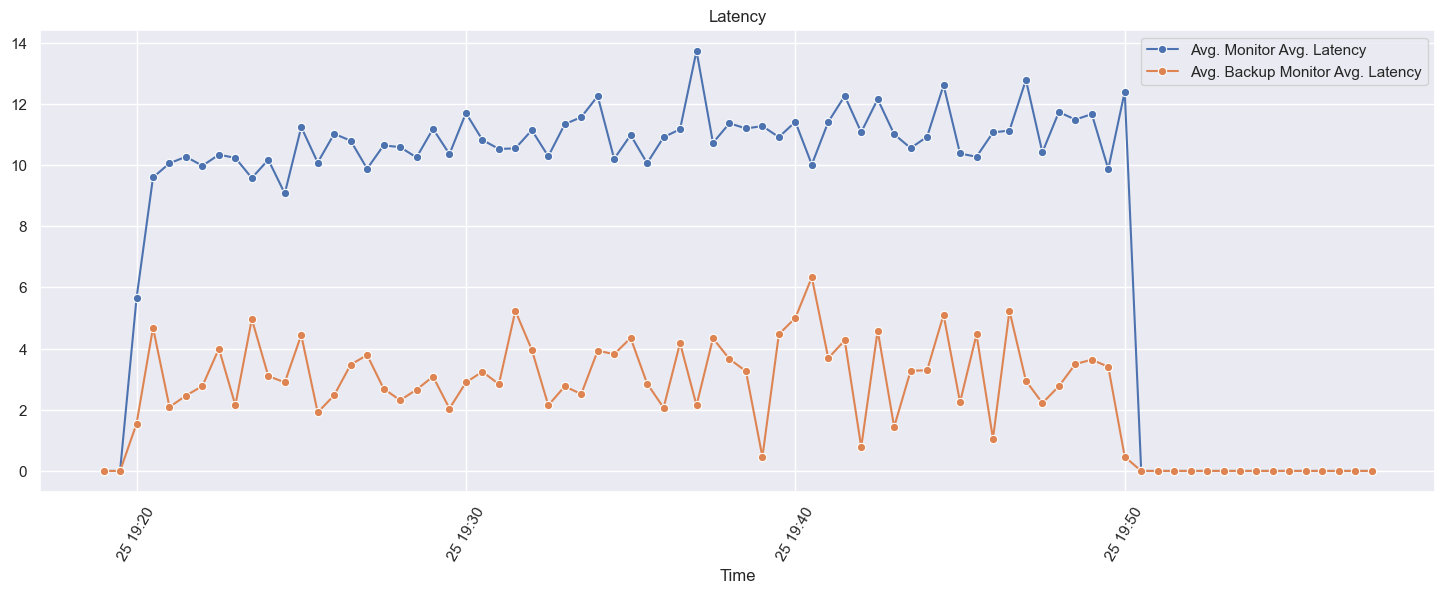

In [6]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22184/2432977327.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  _ = plot.legend(title='')
/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22184/2432977327.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


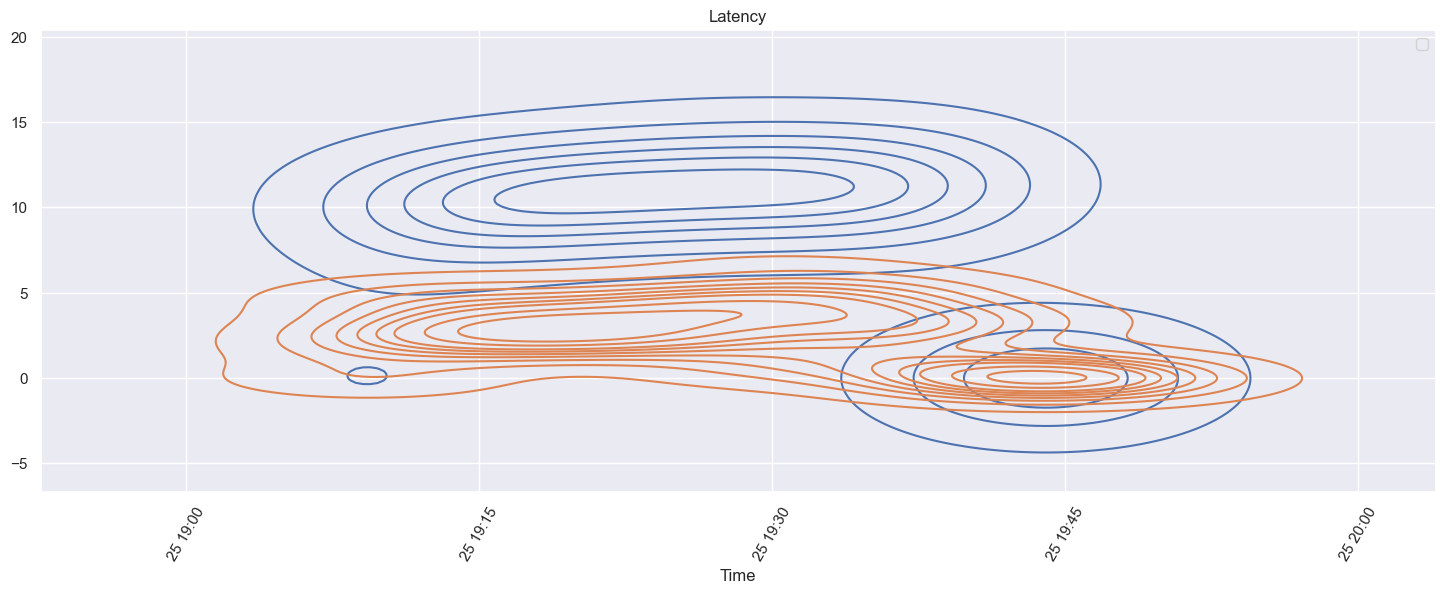

In [7]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.kdeplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True)
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

In [8]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'client_stack_messages_processed_per_sec', 'ordered_batch_size_per_sec']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'client_stack_messages_processed_per_sec', 'variable'] = 'Client stack messages processed per sec'
melted_df.loc[melted_df['variable'] == 'ordered_batch_size_per_sec', 'variable'] = 'Ordered batch size per sec'
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Client stack messages processed per sec,0.000000
1,2024-06-25 19:19:00,Client stack messages processed per sec,0.466667
2,2024-06-25 19:20:00,Client stack messages processed per sec,119.133333
3,2024-06-25 19:21:00,Client stack messages processed per sec,138.016667
4,2024-06-25 19:22:00,Client stack messages processed per sec,152.833333
...,...,...,...
151,2024-06-25 20:31:00,Ordered batch size per sec,0.000000
152,2024-06-25 20:32:00,Ordered batch size per sec,0.000000
153,2024-06-25 20:33:00,Ordered batch size per sec,0.000000
154,2024-06-25 20:34:00,Ordered batch size per sec,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22184/1886614044.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


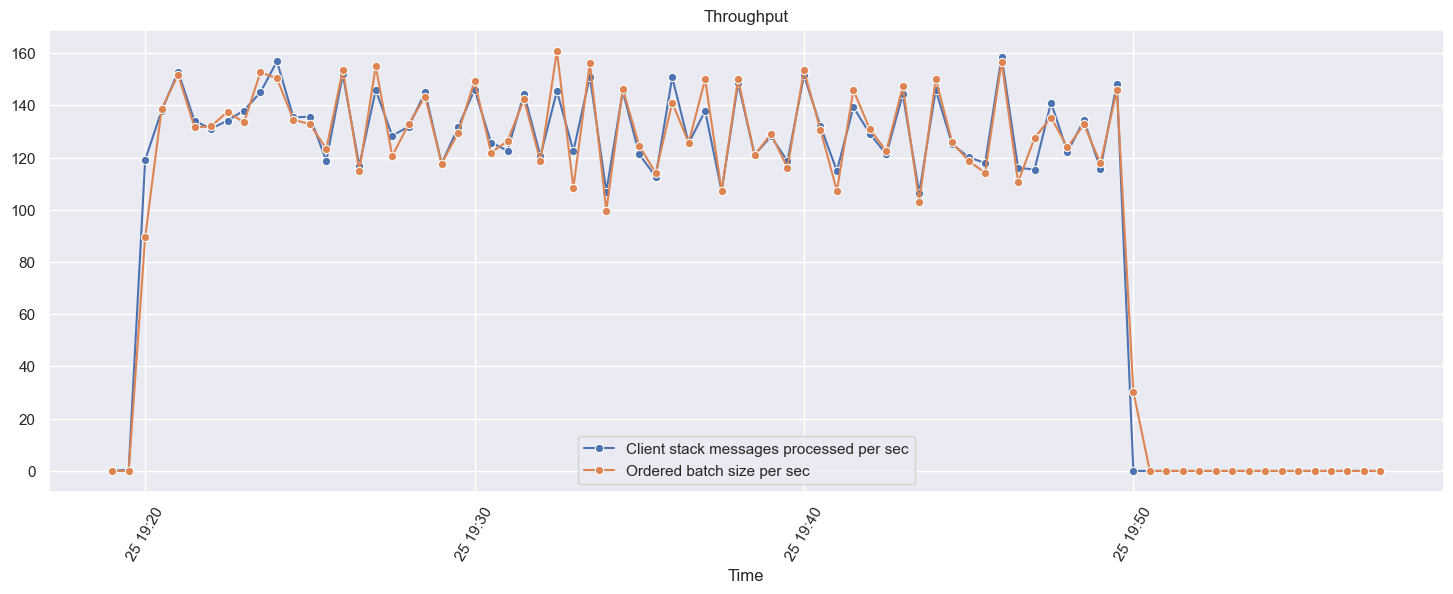

In [9]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22184/1910234944.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  _ = plot.legend(title='')
/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_22184/1910234944.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


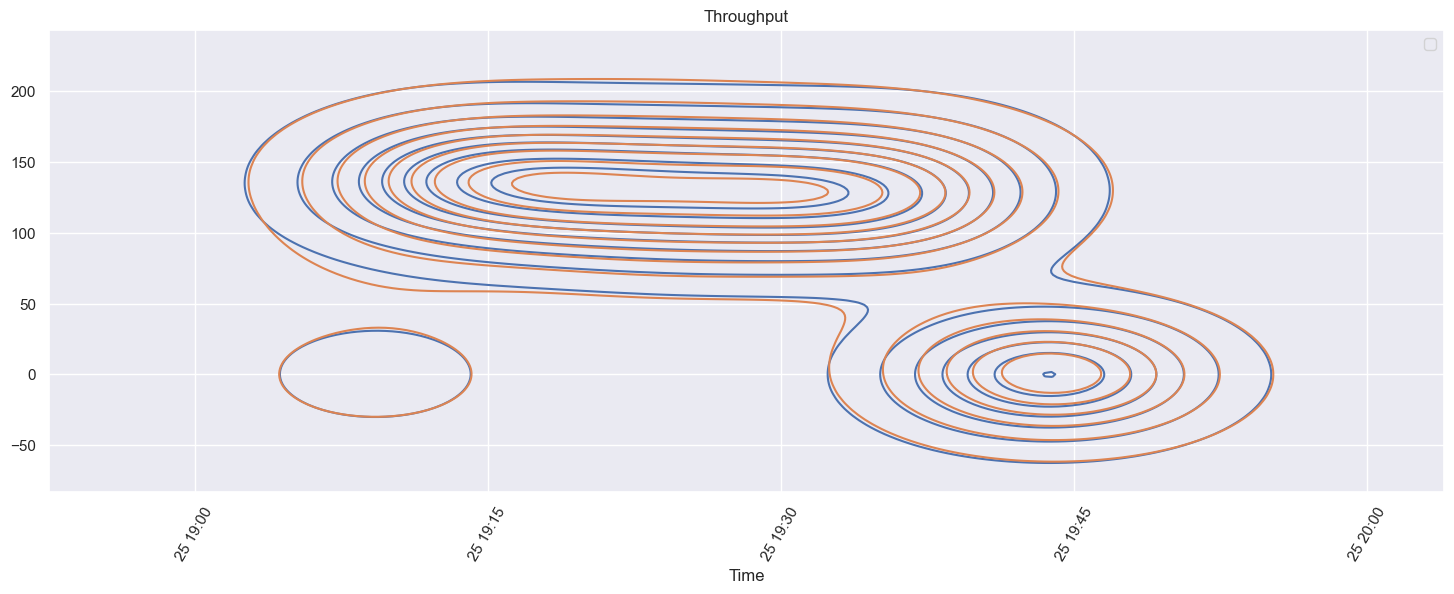

In [10]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.kdeplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True)
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')